<a href="https://colab.research.google.com/github/Harshpatel44/ML-A4/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`#author: Harsh Patel`

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as Func 

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [0]:
iris = datasets.load_iris()

Displaying The IRIS Dataset

In [5]:
# converting the dataset to a numpy array
data_iris = np.array(iris.data)
output = np.array(iris.target)
print(pd.DataFrame(data=data_iris,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']))

     Sepal Length  Sepal Width  Petal Length  Petal Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


Standardising the data

In [6]:
data_iris = StandardScaler().fit_transform(data_iris)
print(pd.DataFrame(data=data_iris,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']))

     Sepal Length  Sepal Width  Petal Length  Petal Width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]


Using PCA to reduce features

In [8]:
pca = decomposition.PCA(n_components=4)
pca_iris=pca.fit_transform(data_iris)
print(pd.DataFrame(data=pca_iris,columns=['PC1','PC2','PC3','PC4']))

          PC1       PC2       PC3       PC4
0   -2.264703  0.480027 -0.127706 -0.024168
1   -2.080961 -0.674134 -0.234609 -0.103007
2   -2.364229 -0.341908  0.044201 -0.028377
3   -2.299384 -0.597395  0.091290  0.065956
4   -2.389842  0.646835  0.015738  0.035923
..        ...       ...       ...       ...
145  1.870503  0.386966  0.256274 -0.389257
146  1.564580 -0.896687 -0.026371 -0.220192
147  1.521170  0.269069  0.180178 -0.119171
148  1.372788  1.011254  0.933395 -0.026129
149  0.960656 -0.024332  0.528249  0.163078

[150 rows x 4 columns]


Visualizing for first two PCA

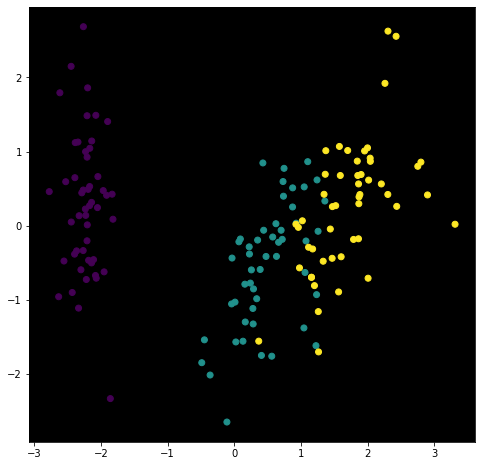

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(pca_iris[:,0],pca_iris[:,1],c=output)
ax = plt.gca()
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0, 0, 0))
plt.show()

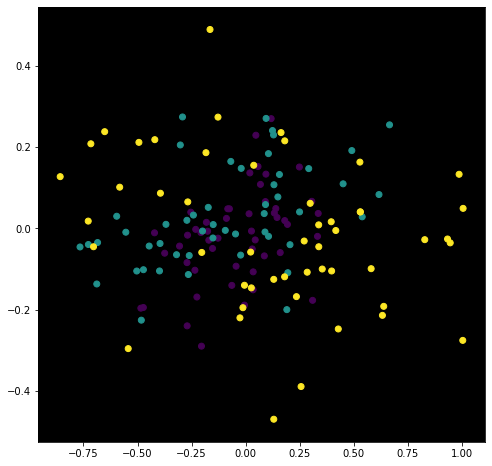

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(pca_iris[:,2],pca_iris[:,3],c=output)
ax = plt.gca()
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0, 0, 0))
plt.show()

Variance ratio of each Principal Component

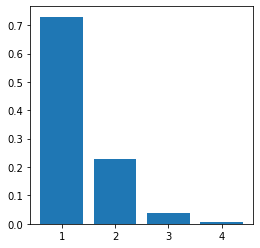

[0.72962445 0.22850762 0.03668922 0.00517871]


In [10]:
plt.figure(figsize=(4,4))
plt.bar([1,2,3,4],pca.explained_variance_ratio_)
plt.show()
print(pca.explained_variance_ratio_) #variance ratio of 50%, 75%, 90%, 95% respectively

                     SCREE PLOT 

**b) PCA FOR FEATURE SELECTION**

Loading MNIST data

In [0]:
mnist = datasets.fetch_openml('mnist_784')

Some functions used in the notebook further

In [0]:
#fn for standard scaling
def scaling(train_,test_):
  scalar = StandardScaler()
  scalar.fit(train_)
  train_=scalar.transform(train_)
  test_=scalar.transform(test_)
  return train_,test_

#fn for plotting all variances
def plot_variances(digits,labels,iteration=3,tight=1):
  fig = plt.figure()
  for i in range(iteration):
    plt.subplot(3,3,i+1)
    if(tight==1):
      plt.tight_layout()
    try:
      plt.imshow(np.reshape(digits,(60000,28,28))[i], cmap='gray', interpolation='none')
    except:
      plt.imshow(np.reshape(digits,(10000,28,28))[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(labels[i]))
    plt.xticks([])
    plt.yticks([])
#fn for converting multi-numpy arrays to torch
def numpy_to_torch(*args):
  temp=[]
  for i in args:
    temp.append(torch.from_numpy( i[0].astype( str(i[1]) )).to( i[2] ))
  return temp

Splitting the training and testing data & Vizualising samples of the dataset.

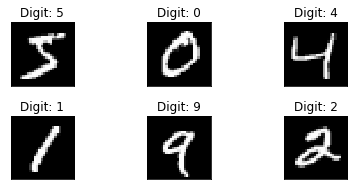

In [6]:
#Data assigned to variables
train = mnist.data[:60000,:]
test =  mnist.data[60000:,:]
y_train = mnist.target[:60000]
y_test =  mnist.target[60000:]
PCAs=[]
performances=[]
y_train,y_test=numpy_to_torch([y_train,"int64","cpu"],[y_test,"int64","cpu"])  #convert to torch
plot_variances(train,y_train,6) #plot

Applying PCA and finding features

Simple Neural Network to test different variances of PCA

In [0]:
def feed_forward(pca_train,pca_test,y_train_,y_test_,batch_size=100,epochs=2,lr=0.001):
  loss_list=[]
  training_acc=[]
  testing_acc=[]
  train_loader = torch.utils.data.DataLoader(pca_train, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(pca_test, batch_size=batch_size, shuffle=False)
  y_train_loader = torch.utils.data.DataLoader(y_train_, batch_size=batch_size, shuffle=False)
  y_test_loader = torch.utils.data.DataLoader(y_test_, batch_size=batch_size, shuffle=False)
  class net(nn.Module):  
    def __init__(self):
      super(net,self).__init__()
      self.fc1 = nn.Linear(pca_train.shape[1],84)
      self.fc2 = nn.Linear(84,10)
    def forward(self,x):
      x=Func.relu(self.fc1(x))
      x=Func.log_softmax(self.fc2(x),dim=1)
      return x
  Net = net()
  #Net.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.RMSprop(Net.parameters(), lr = lr)

  #Evaluating on training data
  def train_eval():
    correct = 0
    total = 0
    with torch.no_grad():
        outputs = Net(pca_train)
        _, predicted = torch.max(outputs.data, 1)
        total += y_train_.shape[0]
        correct += (predicted == y_train_).sum().item()
    train_acc = correct / total
    training_acc.append(train_acc)
    #print('training: ',training_acc)

  #Evaluating on test data
  def test_eval():
    correct = 0
    total = 0
    with torch.no_grad():
        outputs = Net(pca_test)
        _, predicted = torch.max(outputs.data, 1)
        total += y_test_.shape[0]
        correct += (predicted == y_test_).sum().item()
    test_acc = correct / total
    testing_acc.append(test_acc)
    #print('testing_acc:',testing_acc)

  for e in range(epochs):
    for inputs,labels in zip(train_loader,y_train_loader):
      optimizer.zero_grad()
      output = Net(inputs)
      loss = criterion(output,labels)
      loss.backward()
      optimizer.step()
      loss_list.append(loss.item())
    train_eval()
    test_eval()
    #print("Epoch:",e," Training_Acc:",training_acc[-1]," Testing Acc:",testing_acc[-1])
  
  return loss_list, training_acc, testing_acc

Steps we do now:
1. Standard scale the data, select features using PCA, and classify images from PCA features.<br>
2. Use different variances to select features and observing the accuracy of classification.<br>

I maintain a list 'PCAs', which will maintain all the PCA objects.
the values in list will be accordingly as follows: <br><i> <b>PCAs</b>= [ variance, PCA_object, PCA_train(before transformation), PCA_test(before_transformation), PCA_features, PCA_train(after reconstruction), PCA_test(after reconstruction) ]<i>


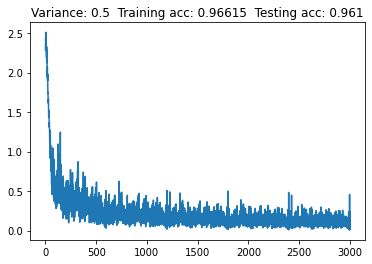

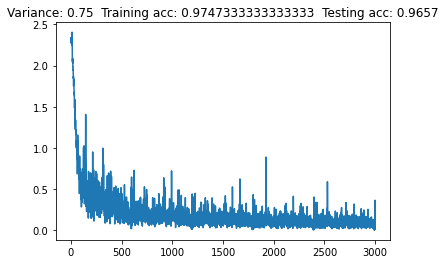

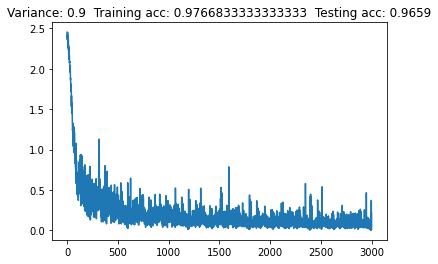

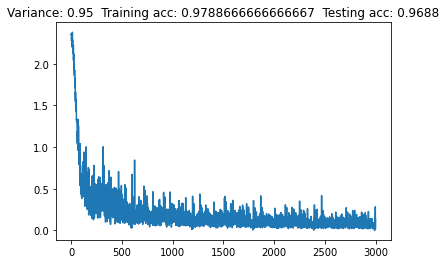

In [8]:
def run_feedforward(train_,test_,y_train_,y_test_,performances):
  temp_performance=[]
  for i in [.50,.75,.90,.95]:
    #pca fit and transform
    pca_mnist=decomposition.PCA(i)
    pca_mnist.fit(train_)
    pca_train = pca_mnist.transform(train_)
    pca_test = pca_mnist.transform(test_)
    
    # appending all the values to the list, including inverse transformation
    #PCAs.append([i,pca_mnist,pca_train,pca_test,pca_train.shape[1],pca_mnist.inverse_transform(pca_train),pca_mnist.inverse_transform(pca_test)])   #maintaining a list PCAs
    PCAs.append({
        'variance':i,
        'pca_features':pca_train.shape[1],
        'pca_obj':pca_mnist,
        'pca_train_before_transformation': pca_train,
        'pca_test_before_transformation': pca_test,
        'pca_train_after_transformation': pca_mnist.inverse_transform(pca_train),
        'pca_test_after_transformation': pca_mnist.inverse_transform(pca_test),
        })
    #converting to tensors 
    pca_train,pca_test=numpy_to_torch([pca_train,"float32","cpu"],[pca_test,"float32","cpu"])
    
    a=time.time()
    losses,train_acc,test_acc = feed_forward(pca_train, pca_test, y_train_.to('cpu'), y_test_.to('cpu'), 100,5) #train_data,test_data,train_labels,test_labels,epochs
    b=time.time()
    
    plt.plot(losses)
    plt.title("Variance: "+str(i)+"  Training acc: "+str(train_acc[-1])+"  Testing acc: "+str(test_acc[-1])+"  Execution_time: "+str(b-a))
    plt.show()

    temp_performance.append([i,train_acc,test_acc,losses])
  performances.append(temp_performance)
  del train_,test_,y_train_,y_test_,temp_performance
  return performances

train_,test_= scaling(train,test)  #standard scaling and transforming on train and test data
performances=run_feedforward(train_,test_,y_train,y_test,performances)


Vizualizing test data digits after reconstruction

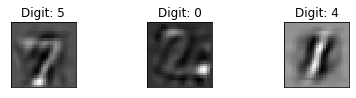

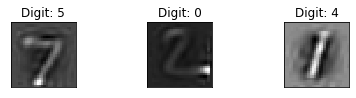

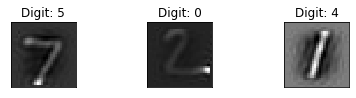

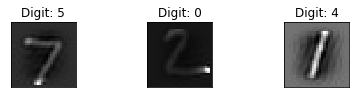

In [9]:
for i in range(4):
  digits2=PCAs[i]['pca_test_after_transformation']
  plot_variances(digits2,y_train,3,1) #(data,label,rows,tight_packed=1)

Above is the Vizualization of images of different variances. <br> 
1st row- 0.50<br>
2nd row- 0.75<br>
3rd row- 0.90<br>
4th row- 0.95

Image classification on reconstructed image data

In [0]:
def cnn_Model(train_,test_,y_train_,y_test_,epochs=2,batch_size=100,filter_size=3,pool_size=2,lr=0.001,dev='cpu'):
  train_=train_.view(-1,1,28,28)
  test_=test_.view(-1,1,28,28)
  training_acc=[]
  testing_acc=[]
  ip_channel=1
  op_channel= 6
  conv_strides=1
  pool_strides=1
  loss_list=[]

  #formula to measure the output from convolution and pooling
  op_conv1 = (( train_.shape[2] - filter_size) / conv_strides) +1
  max_pool1 = (( op_conv1 - pool_size)/pool_strides) + 1
  
  train_loader = torch.utils.data.DataLoader(train_, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(test_, batch_size=batch_size, shuffle=False)
  y_train_loader = torch.utils.data.DataLoader(y_train_, batch_size=batch_size, shuffle=False)
  y_test_loader = torch.utils.data.DataLoader(y_test_, batch_size=batch_size, shuffle=False)

  class net(nn.Module):  
    def __init__(self):
      super(net,self).__init__()      
      if(str(dev)=='cuda'): 
        #print('running on cuda')
        self.conv1 = nn.Conv2d(ip_channel,op_channel,filter_size).cuda()
        self.pool = nn.MaxPool2d(pool_size,pool_strides).cuda()
        self.fc1 = nn.Linear(int(op_channel*max_pool1*max_pool1),84).cuda()
        self.fc2 = nn.Linear(84,10).cuda()
      else:
        #print('running on cpu')
        self.conv1 = nn.Conv2d(ip_channel,op_channel,filter_size)
        self.pool = nn.MaxPool2d(pool_size,pool_strides)
        self.fc1 = nn.Linear(int(op_channel*max_pool1*max_pool1),84)
        self.fc2 = nn.Linear(84,10)
    def forward(self,x):
      x = self.pool(Func.relu(self.conv1(x)))
      x=x.view(-1,int(op_channel*max_pool1*max_pool1))
      x=Func.relu(self.fc1(x))
      x=Func.log_softmax(self.fc2(x),dim=1)
      return x
  Net = net()
  if(dev=='cuda'):
    #print('device set on cuda')
    Net.to(device)  
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.RMSprop(Net.parameters(), lr = lr)

  def train_eval():
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs,labels in zip(train_loader,y_train_loader):
          if(dev=='cuda'):
              inputs = inputs.to(device)
              labels = labels.to(device)
          outputs = Net(inputs)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
    train_acc = correct / total
    training_acc.append(train_acc)

  def test_eval():
    correct = 0
    total = 0
    with torch.no_grad():    
        for inputs,labels in zip(test_loader,y_test_loader):  
          if(dev=='cuda'):
              inputs = inputs.to(device)
              labels = labels.to(device)
          outputs = Net(inputs)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
    test_acc = correct / total
    testing_acc.append(test_acc)

  for e in range(epochs):
    for inputs,labels in zip(train_loader,y_train_loader):
      if(dev=='cuda'):
            inputs = inputs.to(device)
            labels = labels.to(device)
      optimizer.zero_grad()
      outputs = Net(inputs)
      loss = criterion(outputs,labels)
      loss.backward(retain_graph=True)
      optimizer.step()
      loss_list.append(loss.item())
    train_eval()
    test_eval()

  del Net,outputs,inputs,labels,train_,test_
  return loss_list, training_acc, testing_acc

Classification using <b>CNN</b> using different Variances, and observing its accuracies.
* I train CNN on Reconstructed PCA and test on original test data, because I wanted to check if I am training my model on Reconstructed data, how is it responding to my original data.

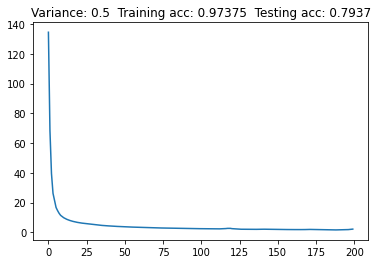

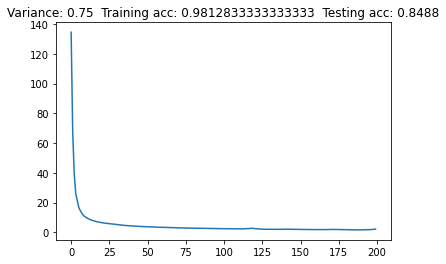

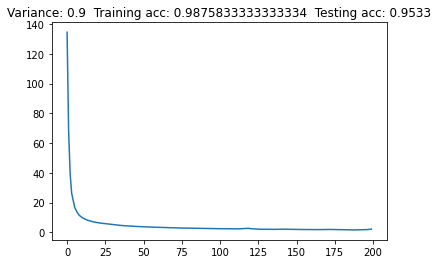

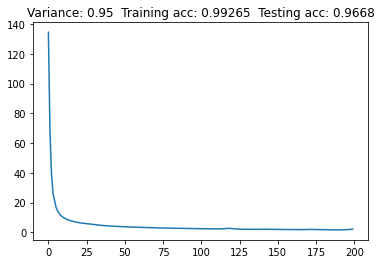

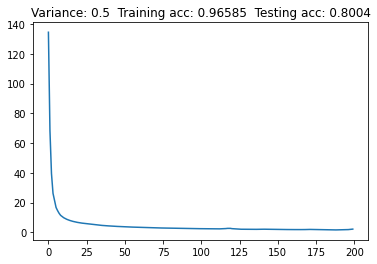

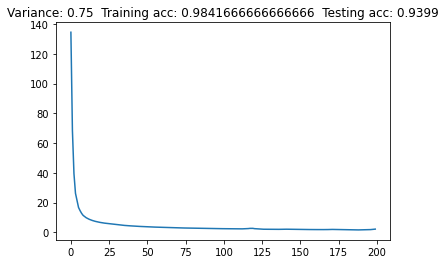

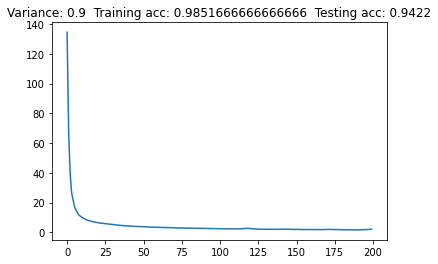

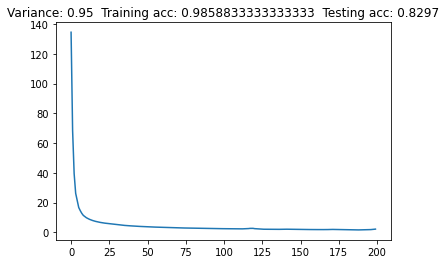

In [295]:
def run_cnn(PCAs,test,y_train,y_test,performances):
  test_,=numpy_to_torch([test,'float32','cpu'],) #to torch
  temp_performance=[]
  for i in PCAs:   
    train_,=numpy_to_torch([i['pca_train_after_transformation'],'float32','cpu'],) #to torch
    
    a=time.time()
    losses,train_acc,test_acc = cnn_Model(train_,test_,y_train,y_test,5,100,4,2,0.001,'cpu') #epochs,batch_size,filter_size,pool_size,gpu or cpu
    b=time.time()

    plt.plot(losses)
    plt.title("Variance: "+str(i['variance'])+"  Training acc: "+str(train_acc[-1])+"  Testing acc: "+str(test_acc[-1])+"  Execution_time: "+str(b-a))
    plt.show()
    
    temp_performance.append([i,train_acc,test_acc,losses])
    #print("Variance: ",i['variance']," || training acc:",train_acc[-1]," || testing acc:",test_acc[-1])
  performances.append(temp_performance)
  return performances

performances=run_cnn(PCAs,test,y_train,y_test,performances)

While Applying PCA over the MNIST data with different variances, the accuracy is varied. difference between variance of .55 and .95 is very high. 

When the image was Reconstructed using PCA, and classification is done using CNN, there is very minor difference between accuracy of variance .55 PCA data and .95 PCA data.

Hence It can be implied that .55 variance has sufficiant information to classify the data
and Accuracy of reconstruction is better than using reduction of features

Comparison for Feedforward Neural Net (retained features) and CNN (reconstructed from retain features)

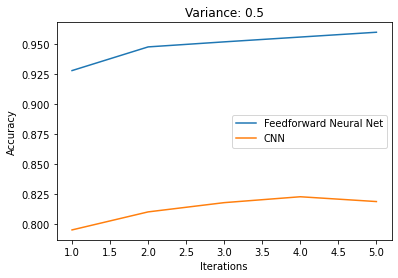

---------------------Variance:  0.5 ---------------------


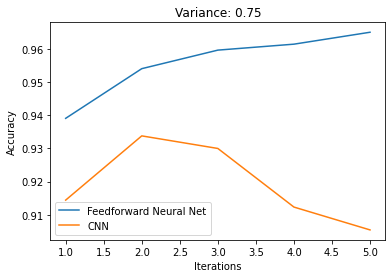

---------------------Variance:  0.75 ---------------------


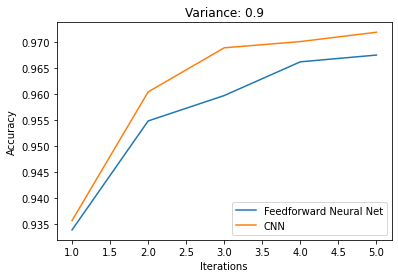

---------------------Variance:  0.9 ---------------------


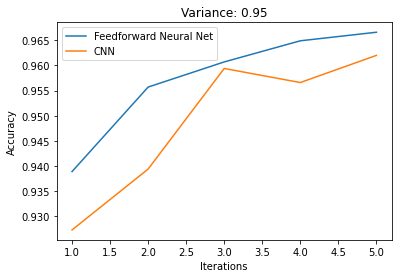

---------------------Variance:  0.95 ---------------------


In [292]:
x_iterations=[1,2,3,4,5]
for i,j in zip(PCAs,range(4)):
  plt.plot(x_iterations,performances[0][j][2],label='Feedforward Neural Net')
  plt.plot(x_iterations,performances[1][j][2],label="CNN")  
  plt.title("Variance: "+str(i['variance']))
  plt.legend()
  plt.xlabel('Iterations')
  plt.ylabel('Accuracy')
  plt.show()

In [0]:
del pca_train
del pca_test

c) and d) <b>Linear & Non-linear autoencoders for dimensionality reduction:</b>

In [0]:
def autoencoder(pca_train,pca_test,y_train,y_test,batch_size=100,hidden_node=200,epochs=2,linear=1):
  loss_item = []
  train_loader = torch.utils.data.DataLoader(pca_train,batch_size=batch_size,shuffle=False)
  test_loader = torch.utils.data.DataLoader(pca_test,batch_size=batch_size,shuffle=False)
  y_train_loader = torch.utils.data.DataLoader(y_train,batch_size=batch_size,shuffle=False)
  y_test_loader = torch.utils.data.DataLoader(y_test,batch_size=batch_size,shuffle=False)
  class encoder_net(nn.Module):
    def __init__(self):
      super(encoder_net,self).__init__()
      self.fc1 = nn.Linear(784,500)
      self.fc2 = nn.Linear(500,hidden_node)
      self.fc3 = nn.Linear(hidden_node,500)
      self.fc4 = nn.Linear(500,784)
    def forward(self,x):
      x = Func.relu(self.fc1(x))
      x = Func.relu(self.fc2(x))
      x = Func.relu(self.fc3(x))
      x = torch.sigmoid(self.fc4(x))
      return x
    def encoder(self,x):
       if(linear==0):
          x = Func.relu(self.fc1(x))
          x = Func.relu(self.fc2(x))
       else:
          x=self.fc1(x)
          x=self.fc2(x)
       return x
    def decoder(self,x):
      if(linear==0):
          x = Func.relu(self.fc3(x)) 
          x = torch.sigmoid(self.fc4(x))
      else:
          x=self.fc3(x)
          x=self.fc4(x)
      return x

  Net = encoder_net()
  criterion = nn.MSELoss()
  optimizer = optim.RMSprop(Net.parameters(), lr=0.001)
  for i in range(epochs):
    for inputs,labels in zip(train_loader,y_train_loader):
      optimizer.zero_grad()
      outputs=Net(inputs)
      loss = criterion(outputs,inputs)
      loss.backward()
      optimizer.step()
      loss_item.append(loss.item())

  encode_train=Net.encoder(pca_train)
  decode_train=Net.decoder(encode_train)
  encode_test=Net.encoder(pca_test)
  decode_test=Net.decoder(encode_test)
  return loss_item,encode_train.detach(),encode_test.detach(),decode_train.detach(),decode_test.detach()

Running Autoencoder network for Linear and Non-linear activation functions. PCA variances are chosen as the number for bottleneck nodes.

* Encoder_list is a list which contains [PCA_variance,   encoded_train_data, encoded_test_data,decoded_train_data,decoded_test_data]<br>


In [0]:
def autoencoder_model(train,test,y_train,y_test,PCAs):
  encoder_list_nl=[]
  encoder_list_l=[]
  enc_train,enc_test=scaling(train,test)  #scaling
  enc_train,enc_test=numpy_to_torch([enc_train,'float32','cpu'],[enc_test,'float32','cpu']) #to torch
  for i in PCAs:
    #encoder_decoder_network on linear and non linear activations
    loss_item_l,encode_train_l,encode_test_l,decode_train_l,decode_test_l=autoencoder(enc_train,enc_test,y_train,y_test,100,i['pca_features'],5,1)  #train,test,train_label,test_label,batch_size,hid_nodes,epochs,linear
    loss_item,encode_train,encode_test,decode_train,decode_test=autoencoder(enc_train,enc_test,y_train,y_test,100,i['pca_features'],5,0)  #train,test,train_label,test_label,batch_size,hid_nodes,epochs,linear
    
    #saving both data in list to use further
    encoder_list_l.append([i['variance'],encode_train_l,encode_test_l,decode_train_l,decode_test_l])
    encoder_list_nl.append([i['variance'],encode_train,encode_test,decode_train,decode_test])
  return encoder_list_l,encoder_list_nl
  del enc_train,enc_test

encoder_list_l,encoder_list_nl=autoencoder_model(train,test,y_train,y_test,PCAs)

Executing Linear and Non-Linear Encoder on feedforward network.

Feedforward Net using Non-Linear Encoder:


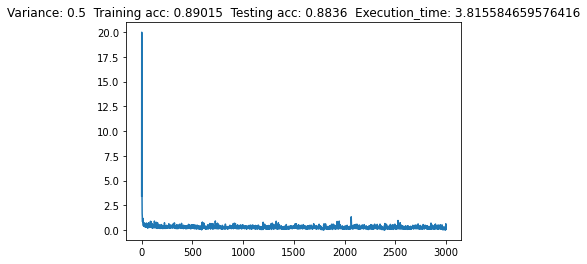

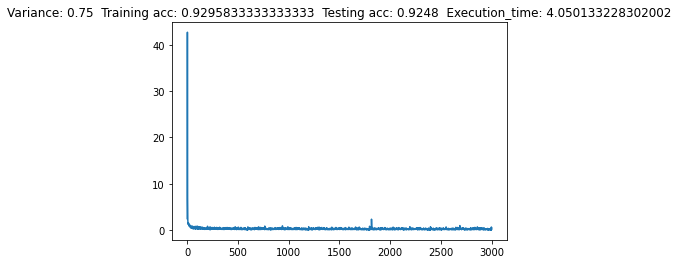

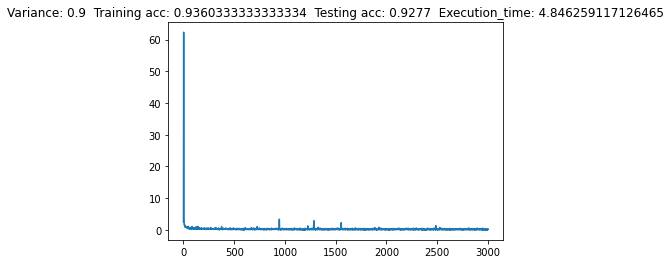

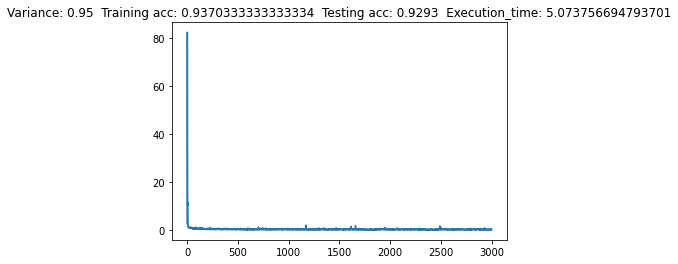

Feedforward Net using Linear Encoder:


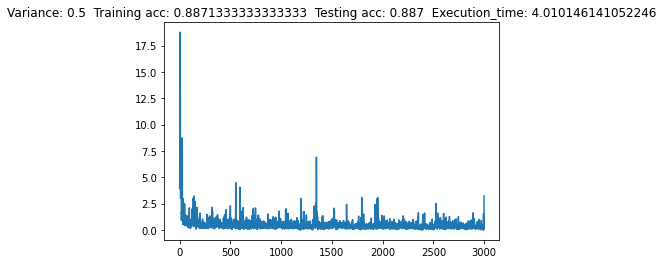

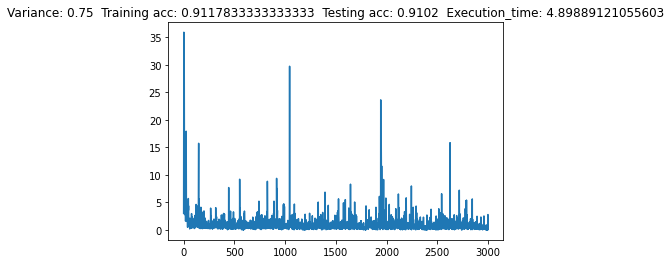

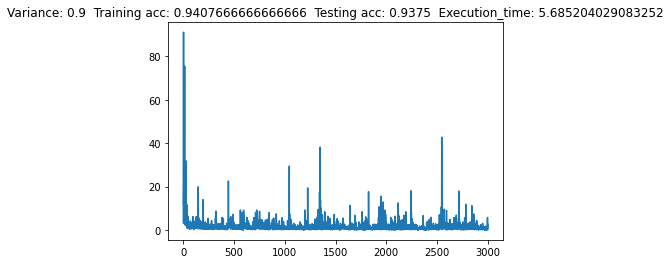

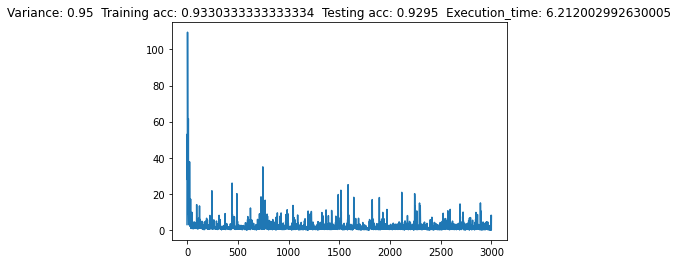

In [76]:
def encoder_non_linear(encoder_list_nl,y_train,y_test,performances):
  print('Feedforward Net using Non-Linear Encoder:')
  temp_performance=[]
  for i in encoder_list_nl:
    #encoded data on simple feedforward network 
    #train_,test_=scaling(i[1],i[2])
    a=time.time()
    losses,feed_train_acc,feed_test_acc = feed_forward(i[1],i[2],y_train,y_test,100,5,lr=0.01) #train_data,test_data,train_labels,test_labels,epochs,lr
    b=time.time()

    plt.plot(losses)
    plt.title("Variance: "+str(i[0])+"  Training acc: "+str(feed_train_acc[-1])+"  Testing acc: "+str(feed_test_acc[-1])+"  Execution_time: "+str(b-a))
    plt.show()
    temp_performance.append([i[0],feed_train_acc,feed_test_acc,losses])
  performances.append(temp_performance) #append values to performance

def encoder_linear(encoder_list_l,y_train,y_test,performances):
  print('Feedforward Net using Linear Encoder:')
  temp_performance=[]
  for i in encoder_list_l:
    #encoded data on simple feedforward network
    train_,test_=scaling(i[1],i[2])
    a=time.time()
    losses,feed_train_acc,feed_test_acc = feed_forward(i[1],i[2],y_train,y_test,100,5,lr=0.01) #train_data,test_data,train_labels,test_labels,epochs,lr
    b=time.time()

    plt.plot(losses)
    plt.title("Variance: "+str(i[0])+"  Training acc: "+str(feed_train_acc[-1])+"  Testing acc: "+str(feed_test_acc[-1])+"  Execution_time: "+str(b-a))
    plt.show()
    temp_performance.append([i[0],feed_train_acc,feed_test_acc,losses])
  performances.append(temp_performance)  #append values to performance

encoder_non_linear(encoder_list_nl,y_train,y_test,performances)
encoder_linear(encoder_list_l,y_train,y_test,performances)

Performance Evaluation between Linear and Non linear Encoder on Feedforward Network

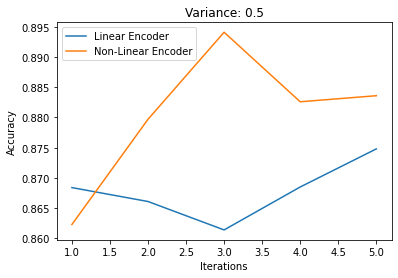

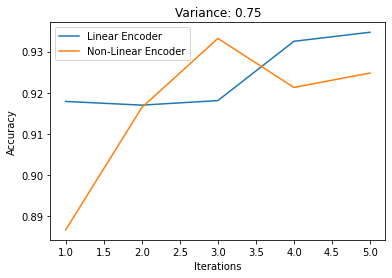

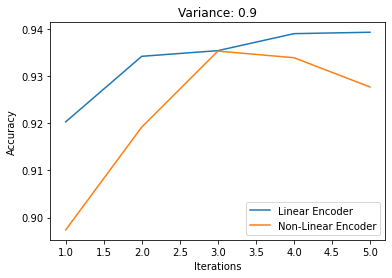

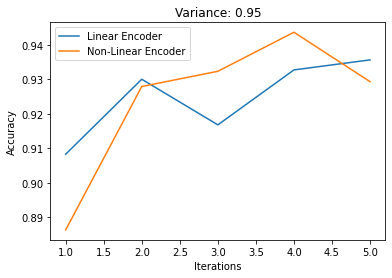

In [78]:
x_iterations=[1,2,3,4,5]
for i,j in zip(PCAs,range(4)):
  plt.plot(x_iterations,performances[2][j][2],label='Linear Encoder')
  plt.plot(x_iterations,performances[3][j][2],label="Non-Linear Encoder")  
  plt.title("Variance: "+str(i['variance']))
  plt.legend()
  plt.xlabel('Iterations')
  plt.ylabel('Accuracy')
  plt.show()

Visualization of decoded images from autoencoder network

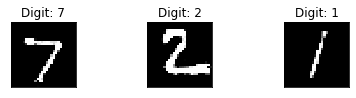

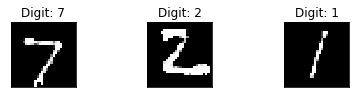

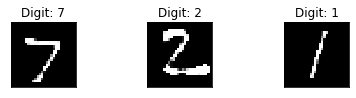

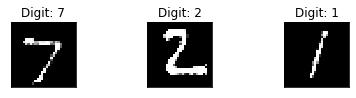

In [93]:
for i in encoder_list_nl:
  digits=i[4].detach()
  plot_variances(digits,y_test,3,1)

Above is the Vizualization of Reconstructed images using autoencoder. <br> Variances are accordingly as follows: <br>
1st row- 0.50<br>
2nd row- 0.75<br>
3rd row- 0.90<br>
4th row- 0.95

Decoded data from encoder network, is passed to CNN network to classify images.

1. Network using Non-Linear Functions

CNN Net on Non-Linear functions:


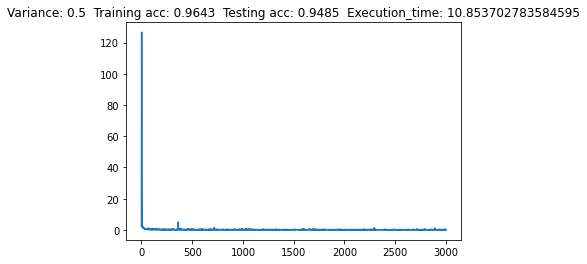

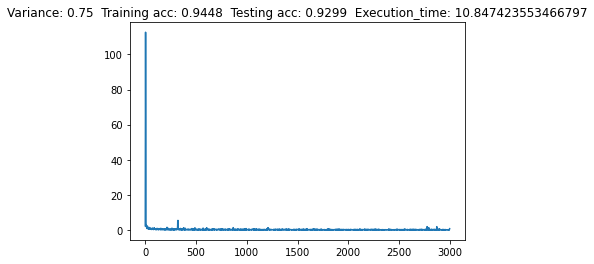

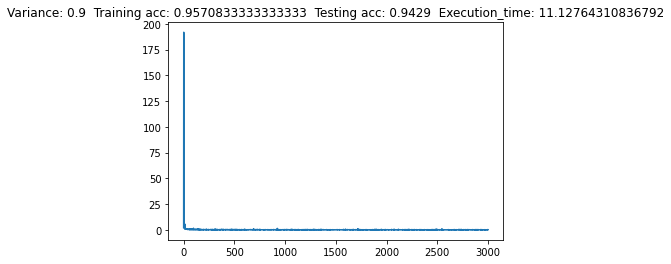

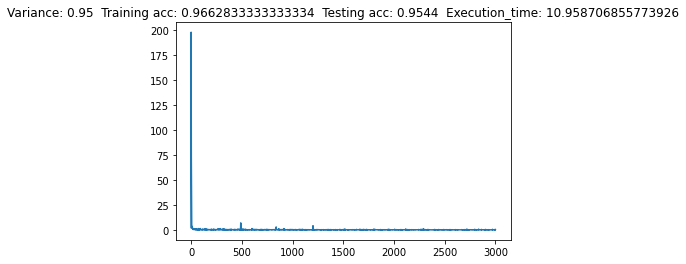

In [102]:
def non_linear_encoder_cnn(encoder_list_nl,y_train,y_test,performances):
  print('CNN Net on Non-Linear functions:')
  temp_performance=[]
  for i in encoder_list_nl:
    #data manipulated for standard scaling, and again converted to vector
    decode_train_=i[3].reshape((60000,784)).detach().numpy()
    decode_test_=i[4].reshape((10000,784)).detach().numpy()
    decode_train_,decode_test_=scaling(decode_train_,decode_test_)
    decode_train=torch.from_numpy(decode_train_)
    decode_test=torch.from_numpy(decode_test_)
    
    a=time.time()
    losses,cnn_train_acc,cnn_test_acc = cnn_Model(decode_train,decode_test,y_train,y_test,5,100,4,2,0.01,'cuda') #epochs,batch_size,filter_size,pool_size
    b=time.time()

    plt.plot(losses)
    plt.title("Variance: "+str(i[0])+"  Training acc: "+str(cnn_train_acc[-1])+"  Testing acc: "+str(cnn_test_acc[-1])+"  Execution_time: "+str(b-a))
    plt.show()
    temp_performance.append([i[0],cnn_train_acc,cnn_test_acc,losses])
  performances.append(temp_performance)
  del temp_performance
  return performances

performances=non_linear_encoder_cnn(encoder_list_nl,y_train,y_test,performances)

2. Network using Linear Functions

CNN Net on Linear functions:


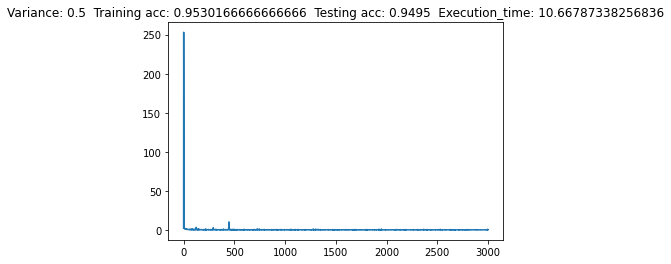

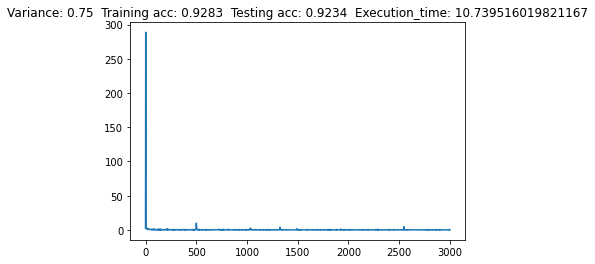

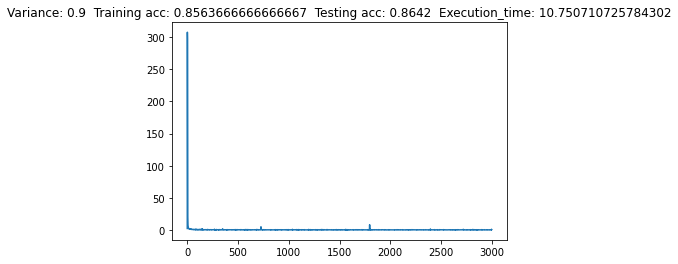

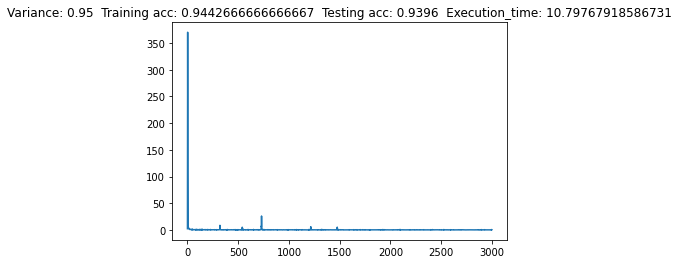

In [104]:
def linear_encoder_cnn(encoder_list_l,y_train,y_test,performances):
  temp_performance=[]
  print('CNN Net on Linear functions:')
  for i in encoder_list_l:
    #data manipulated for standard scaling, and again converted to vector
    decode_train_=i[3].reshape((60000,784)).detach().numpy()
    decode_test_=i[4].reshape((10000,784)).detach().numpy()
    decode_train_,decode_test_=scaling(decode_train_,decode_test_)
    decode_train=torch.from_numpy(decode_train_)
    decode_test=torch.from_numpy(decode_test_)

    a=time.time()
    losses,cnn_train_acc,cnn_test_acc = cnn_Model(decode_train,decode_test,y_train,y_test,5,100,4,2,0.01,'cuda') #epochs,batch_size,filter_size,pool_size
    b=time.time()
    
    plt.plot(losses)
    plt.title("Variance: "+str(i[0])+"  Training acc: "+str(cnn_train_acc[-1])+"  Testing acc: "+str(cnn_test_acc[-1])+"  Execution_time: "+str(b-a))
    plt.show()
    temp_performance.append([i[0],cnn_train_acc,cnn_test_acc,losses])
  performances.append(temp_performance)
  del temp_performance
  return performances
performances=linear_encoder_cnn(encoder_list_l,y_train,y_test,performances)

Assignment 4 complete
